# **Milestone 1**

In [1]:
# ========================================
# 1. Data Preparation & Initial Analysis
# ========================================
# 1. Install dependencies
!pip install pandas numpy

import pandas as pd
import numpy as np

In [2]:
# ========================================
# 2. Upload dataset
# ========================================
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("/content/weather_filled.csv", engine='python', on_bad_lines='skip')

Saving weather_filled.csv to weather_filled.csv


In [3]:
# ========================================
# 3. Inspect dataset
# ========================================
print("=== Dataset Overview ===")
print(f"Shape (rows, columns): {df.shape}\n")

print("=== First 20 Columns ===")
print(df.columns.tolist()[:20], "\n")

print("=== Data Types (first 15) ===")
print(df.dtypes.head(15), "\n")

print("=== Sample Rows ===")
display(df.head(5))


=== Dataset Overview ===
Shape (rows, columns): (135023, 41)

=== First 20 Columns ===
['country', 'location_name', 'latitude', 'longitude', 'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius', 'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud'] 

=== Data Types (first 15) ===
country                    object
location_name              object
latitude                  float64
longitude                 float64
timezone                   object
last_updated_epoch          int64
last_updated               object
temperature_celsius       float64
temperature_fahrenheit    float64
condition_text             object
wind_mph                  float64
wind_kph                  float64
wind_degree                 int64
wind_direction             object
pressure_mb               float64
dtype: object 

=== Sample Rows ===


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93


In [4]:
# ========================================
# 4. Check missing values
# ========================================
print("\nMissing values (%):\n", (df.isna().mean() * 100).sort_values(ascending=False).head(10))


Missing values (%):
 country                   0.0
location_name             0.0
latitude                  0.0
longitude                 0.0
timezone                  0.0
last_updated_epoch        0.0
last_updated              0.0
temperature_celsius       0.0
temperature_fahrenheit    0.0
condition_text            0.0
dtype: float64


In [5]:

# ========================================
# 5. Basic cleaning
## Rename columns to lowercase_with_underscores
# ========================================
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
              .str.replace(r"[^a-z0-9_]", "", regex=True)
)

## Parse datetime
if "last_updated" in df.columns:
    df["last_updated"] = pd.to_datetime(df["last_updated"], errors="coerce")
    df["year"] = df["last_updated"].dt.year
    df["month"] = df["last_updated"].dt.month

## Remove duplicates
df = df.drop_duplicates()

## Handle missing humidity & precipitation
if "humidity" in df.columns:
    df["humidity"] = df["humidity"].clip(0, 100)

if "precip_mm" in df.columns:
    df["precip_mm"] = df["precip_mm"].clip(lower=0)

# Wind speed: derive meters/second from km/h
if "wind_kph" in df.columns:
    df["wind_speed_ms"] = df["wind_kph"] / 3.6

# Pressure: rename mb -> hPa
if "pressure_mb" in df.columns:
    df = df.rename(columns={"pressure_mb":"pressure_hpa"})
print("Shape after cleaning:", df.shape)
print("Missing values (%):\n", (df.isna().mean() * 100).head(10))
print("\nSample cleaned data:\n", df.head(5))

Shape after cleaning: (135023, 44)
Missing values (%):
 country                   0.0
location_name             0.0
latitude                  0.0
longitude                 0.0
timezone                  0.0
last_updated_epoch        0.0
last_updated              0.0
temperature_celsius       0.0
temperature_fahrenheit    0.0
condition_text            0.0
dtype: float64

Sample cleaned data:
        country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch        last_updated  temperature_celsius  \
0          1693301400 2023-08-29 14:00:00                 28.8   
1          1693301400 2023-08-29 11

In [6]:
# ========================================
# 6. Save cleaned dataset
# ========================================
df.to_csv("cleaned_weather.csv", index=False)
print("\n Cleaned dataset saved as cleaned_weather.csv")


 Cleaned dataset saved as cleaned_weather.csv


In [7]:
# ========================================
# 7. Aggregate monthly averages
# ========================================
if "location_name" in df.columns and "last_updated" in df.columns:
    monthly = (
        df.groupby(["country","location_name","year","month"], as_index=False)
          .agg({
              "temperature_celsius":"mean",
              "humidity":"mean",
              "wind_speed_ms":"mean",
              "precip_mm":"sum",
              "pressure_hpa":"mean"
          })
    )
    monthly.to_csv("monthly_weather.csv", index=False)
    print(" Monthly aggregated dataset saved as monthly_weather.csv")

 Monthly aggregated dataset saved as monthly_weather.csv


In [8]:
# ========================================
# Load cleaned dataset
# ========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned file
df = pd.read_csv("/content/cleaned_weather.csv")

# Parse datetime again if needed
df["last_updated"] = pd.to_datetime(df["last_updated"], errors="coerce")

print("Shape:", df.shape)
df.head(3)


Shape: (135023, 44)


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_gbdefraindex,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,year,month,wind_speed_ms
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00:00,28.8,83.8,Sunny,...,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93,2023,8,3.194444
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30:00,27.0,80.6,Partly cloudy,...,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93,2023,8,1.694444
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30:00,28.0,82.4,Partly cloudy,...,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93,2023,8,3.611111


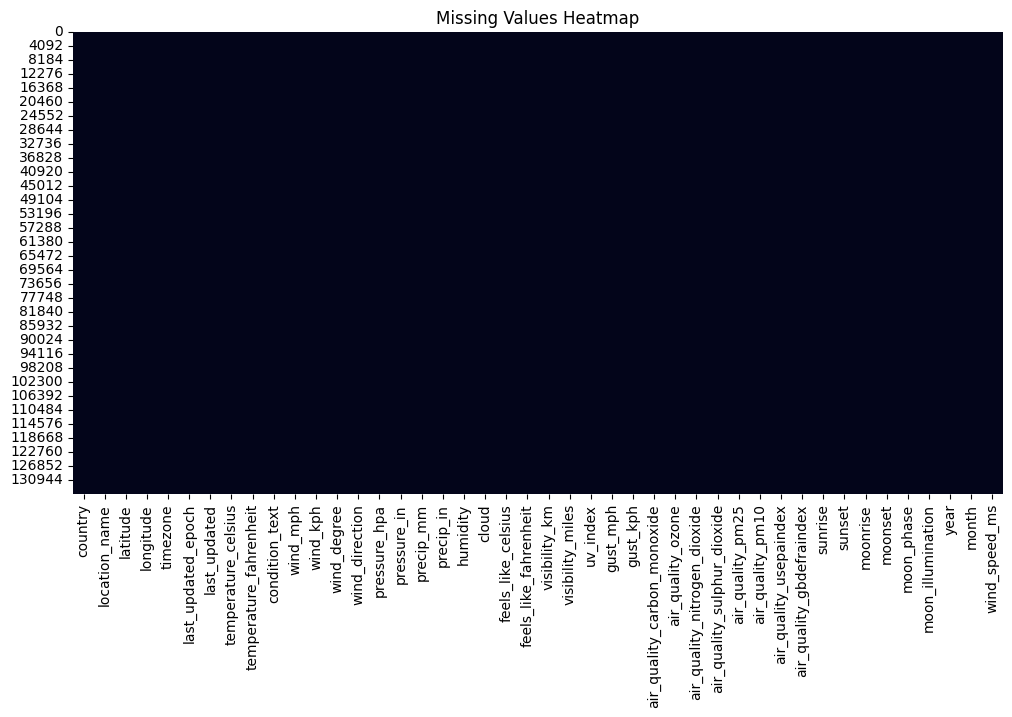

In [9]:
# ========================================
# Missing values heatmap
# ========================================
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


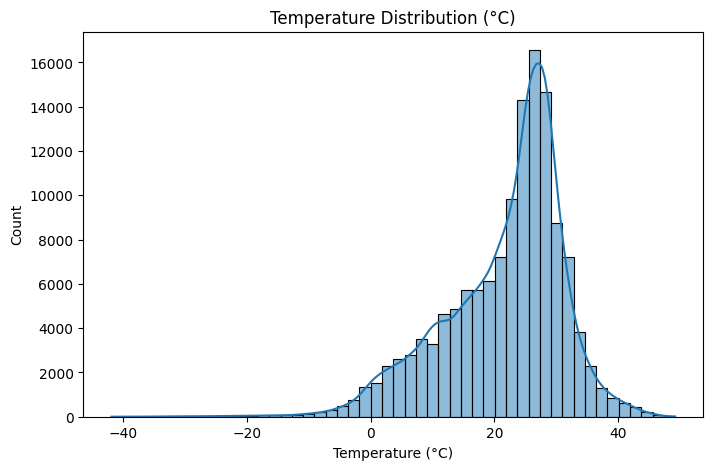

In [10]:
# ========================================
# Distribution of Temperature
# ========================================
plt.figure(figsize=(8,5))
sns.histplot(df["temperature_celsius"], bins=50, kde=True)
plt.title("Temperature Distribution (°C)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.show()


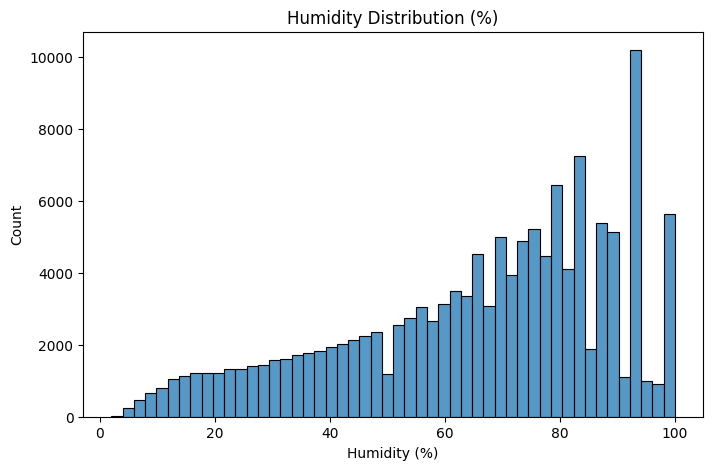

In [11]:
# ========================================
# Distribution of Humidity
# ========================================
plt.figure(figsize=(8,5))
sns.histplot(df["humidity"], bins=50, kde=False)
plt.title("Humidity Distribution (%)")
plt.xlabel("Humidity (%)")
plt.ylabel("Count")
plt.show()


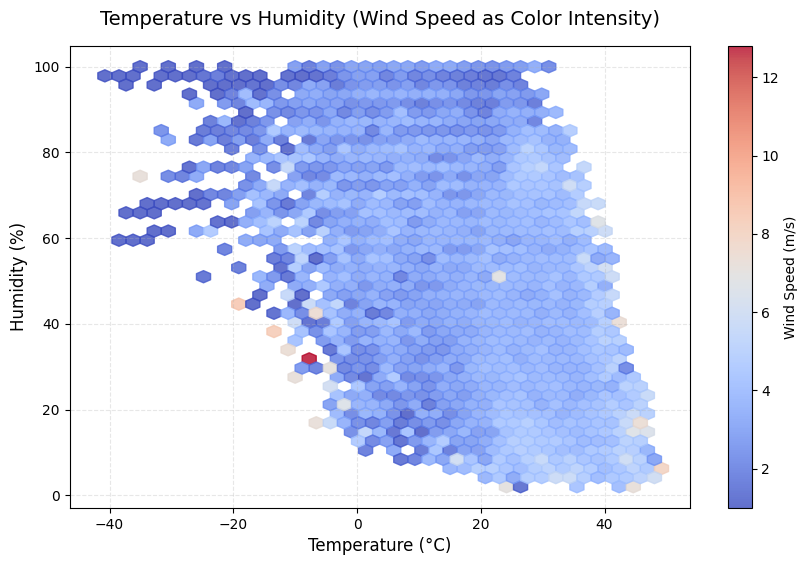

In [12]:
# ========================================
#  Hexbin Temperature vs Humidity
# ========================================
plt.figure(figsize=(10,6))

hb = plt.hexbin(
    df["temperature_celsius"],
    df["humidity"],
    C=df["wind_speed_ms"],
    gridsize=40,
    cmap="coolwarm",
    reduce_C_function=np.mean,
    alpha=0.8
)

plt.colorbar(hb, label="Wind Speed (m/s)")
plt.title("Temperature vs Humidity (Wind Speed as Color Intensity)", fontsize=14, pad=15)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(alpha=0.3, linestyle="--")
plt.show()



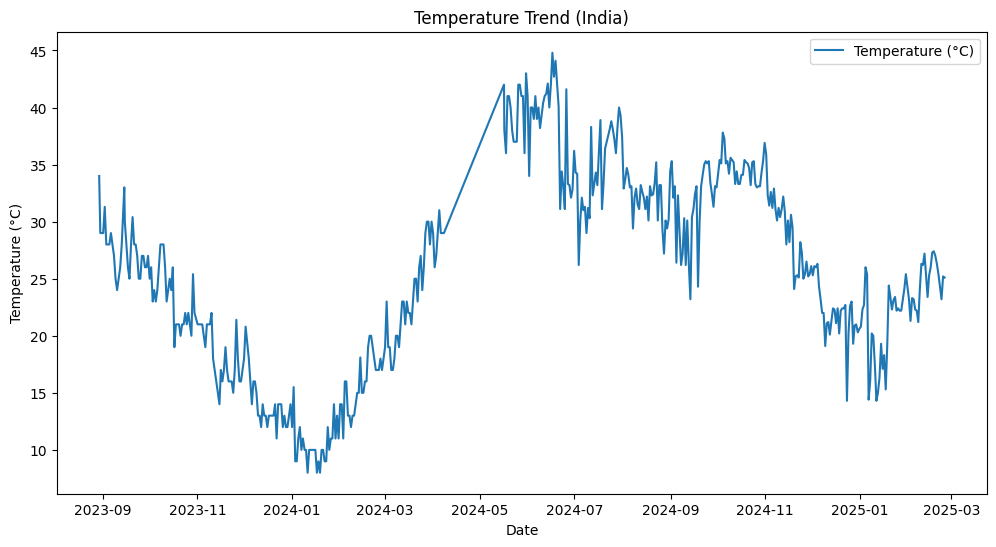

In [13]:
# ========================================
#  Time-Series Line Plot (Temperature over Time)
# Pick one country for clarity
# ========================================
country_df = df[df["country"]=="India"].sort_values("last_updated").head(500)

plt.figure(figsize=(12,6))
plt.plot(country_df["last_updated"], country_df["temperature_celsius"], label="Temperature (°C)")
plt.title("Temperature Trend (India)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


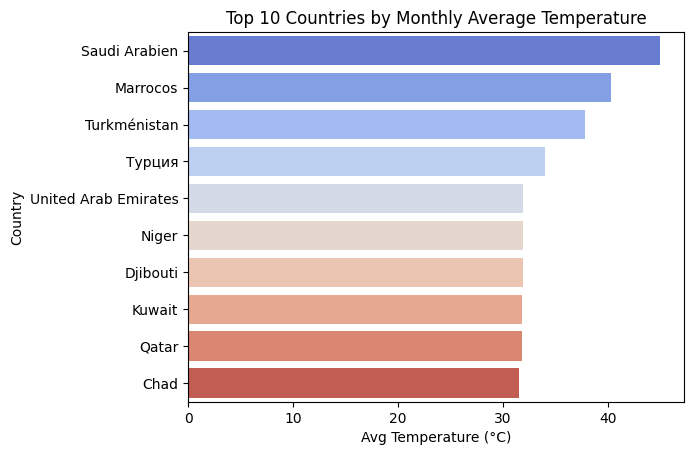

In [14]:
# ======================================================
# TOP 10 COUNTRIES BY AVERAGE TEMPERATURE
# ======================================================
import warnings
warnings.filterwarnings("ignore")  # Hide warnings for clean output

top10_temp = (
    monthly.groupby("country")["temperature_celsius"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot Top 10 countries
sns.barplot(x="temperature_celsius", y="country", data=top10_temp, palette="coolwarm")


plt.title("Top 10 Countries by Monthly Average Temperature")
plt.xlabel("Avg Temperature (°C)")
plt.ylabel("Country")
plt.show()


# **Milestone 1 completed**



# **Milestone 2 – Core Analysis & Visualization Design**
### **Objective:** Perform statistical analysis, detect trends, identify extreme events, compare regions, explore correlations, and design visualizations for dashboard wireframes.

In [15]:
# ============================================
# Milestone 2: Core Analysis & Visualization Design
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset from Milestone 1
df = pd.read_csv("/content/cleaned_weather.csv")
monthly = pd.read_csv("/content/monthly_weather.csv")

In [16]:
# --------------------------------------------
# 1. Summary Statistics
# --------------------------------------------
print("Summary Statistics:")
print(df[["temperature_celsius","humidity","wind_speed_ms","precip_mm","pressure_hpa"]].describe())

Summary Statistics:
       temperature_celsius       humidity  wind_speed_ms      precip_mm  \
count        135023.000000  135023.000000  135023.000000  135023.000000   
mean             21.692591      65.749694       3.598637       0.138510   
std               9.679223      23.497649       3.242014       0.602553   
min             -41.900000       2.000000       1.000000       0.000000   
25%              16.100000      50.000000       1.694444       0.000000   
50%              24.200000      71.000000       3.111111       0.000000   
75%              28.200000      84.000000       4.888889       0.020000   
max              49.200000     100.000000     823.111111      42.240000   

        pressure_hpa  
count  135023.000000  
mean     1013.884871  
std        10.457361  
min       947.000000  
25%      1010.000000  
50%      1013.000000  
75%      1018.000000  
max      3006.000000  


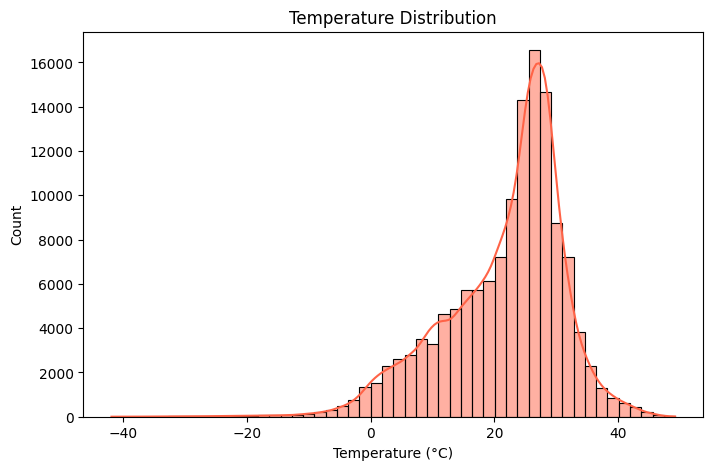

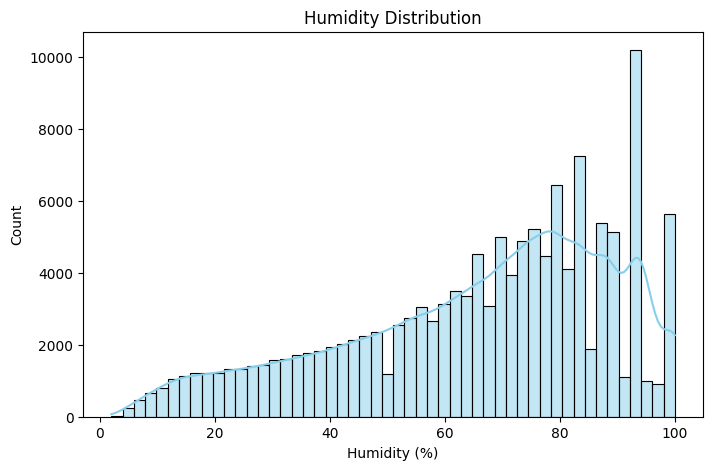

In [17]:
# --------------------------------------------
# 2. Distributions
# --------------------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["temperature_celsius"], bins=50, kde=True, color="tomato")
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df["humidity"], bins=50, kde=True, color="skyblue")
plt.title("Humidity Distribution")
plt.xlabel("Humidity (%)")
plt.show()

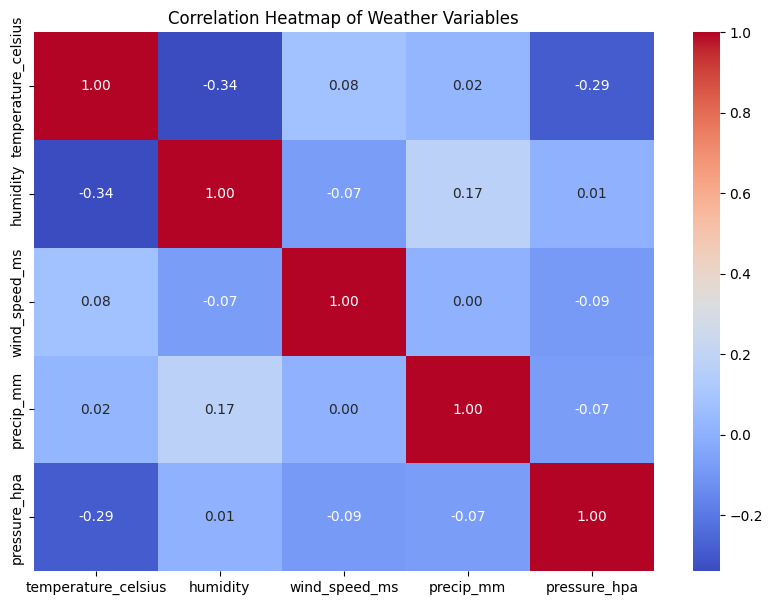

In [18]:
# --------------------------------------------
# 3. Correlation Heatmap
# --------------------------------------------
features = ["temperature_celsius","humidity","wind_speed_ms","precip_mm","pressure_hpa"]
plt.figure(figsize=(10,7))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Weather Variables")
plt.show()

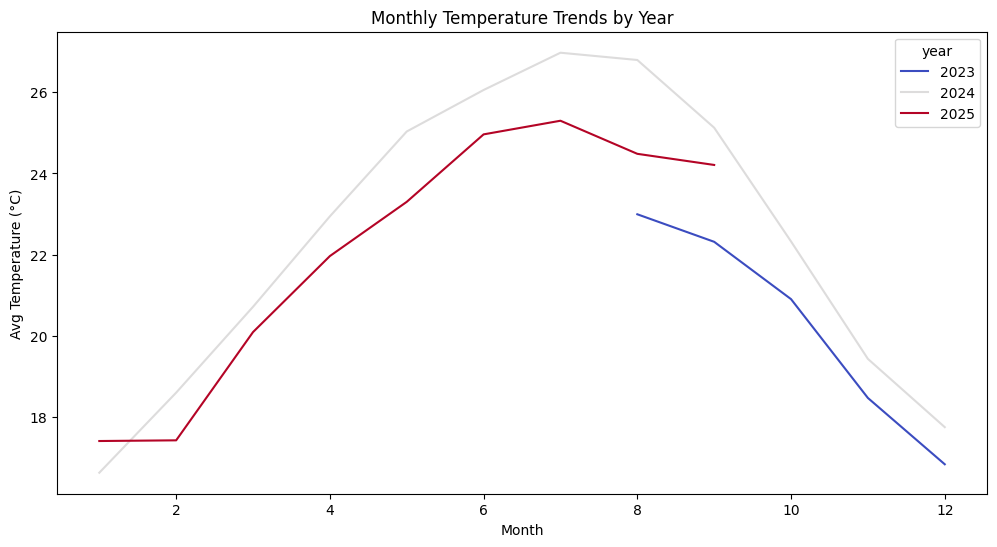

In [19]:
# --------------------------------------------
# 4. Seasonal Trends (Monthly)
# --------------------------------------------
import warnings
warnings.filterwarnings("ignore")  # Hide warnings for clean output
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x="month", y="temperature_celsius", hue="year", ci=None, palette="coolwarm")
plt.title("Monthly Temperature Trends by Year")
plt.xlabel("Month")
plt.ylabel("Avg Temperature (°C)")
plt.show()

In [20]:
# --------------------------------------------
# 5. Extreme Weather Events
# --------------------------------------------
extreme_heat = df[df["temperature_celsius"] > 40]
extreme_cold = df[df["temperature_celsius"] < 0]
extreme_rain = df[df["precip_mm"] > 100]

print("\nExtreme Heat Events (>40°C):", extreme_heat.shape[0])
print("Extreme Cold Events (<0°C):", extreme_cold.shape[0])
print("Extreme Rain Events (>100mm):", extreme_rain.shape[0])



Extreme Heat Events (>40°C): 1372
Extreme Cold Events (<0°C): 3322
Extreme Rain Events (>100mm): 0


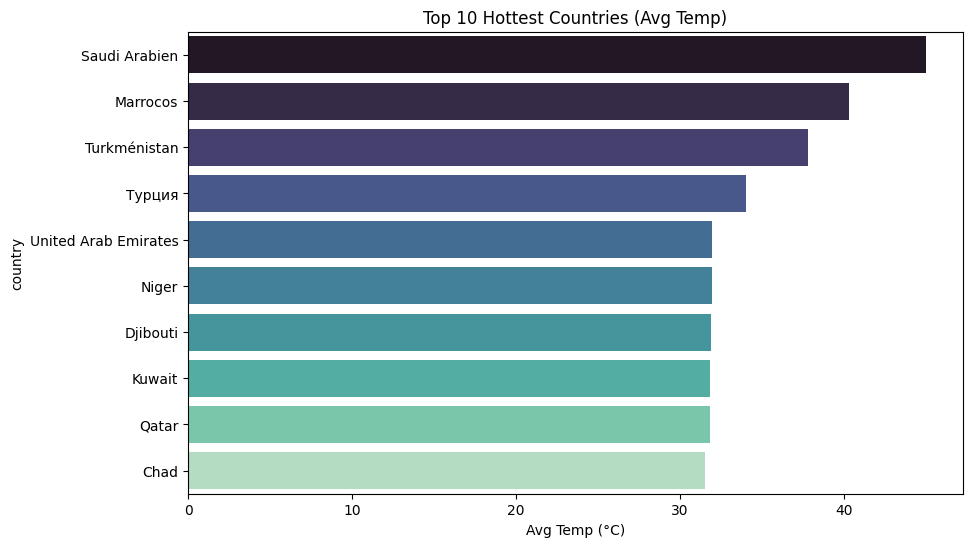

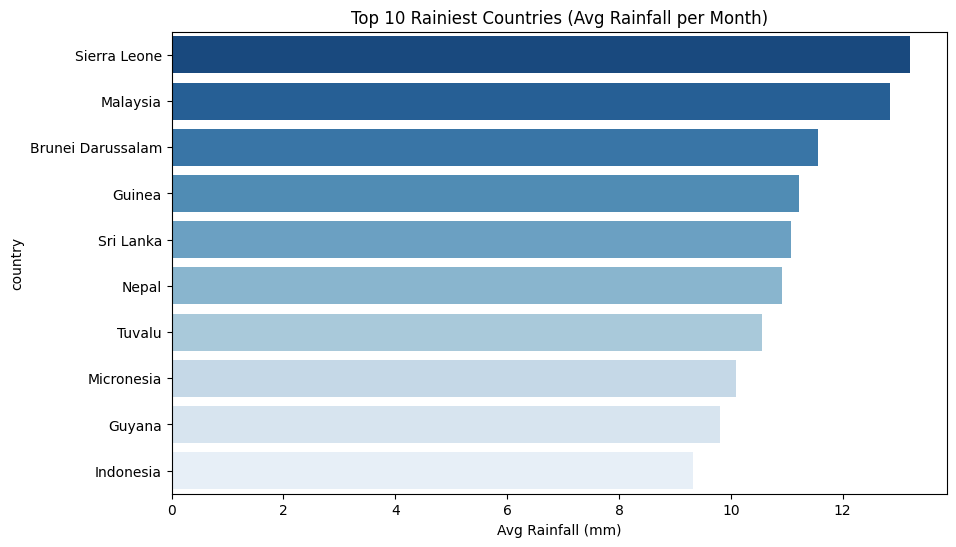

In [21]:
# --------------------------------------------
# 6. Regional Comparisons
# --------------------------------------------
top_countries_temp = monthly.groupby("country")["temperature_celsius"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries_temp.values, y=top_countries_temp.index, palette="mako")
plt.title("Top 10 Hottest Countries (Avg Temp)")
plt.xlabel("Avg Temp (°C)")
plt.show()

top_countries_rain = monthly.groupby("country")["precip_mm"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries_rain.values, y=top_countries_rain.index, palette="Blues_r")
plt.title("Top 10 Rainiest Countries (Avg Rainfall per Month)")
plt.xlabel("Avg Rainfall (mm)")
plt.show()

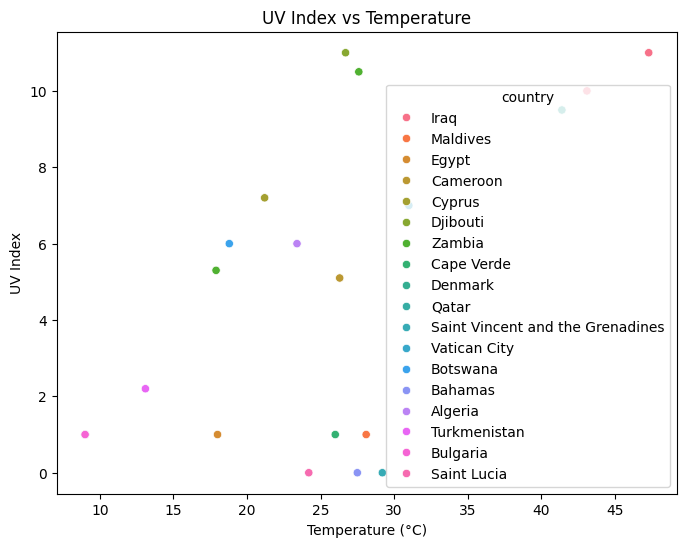

In [22]:

# ======================================================
# 7.UV Index vs Temperature (Scatterplot)
# Checks relationship between UV intensity and temperature
# ======================================================
if "uv_index" in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="temperature_celsius", y="uv_index", hue="country", data=df.sample(20))
    plt.title("UV Index vs Temperature")
    plt.xlabel("Temperature (°C)")
    plt.ylabel("UV Index")
    plt.show()

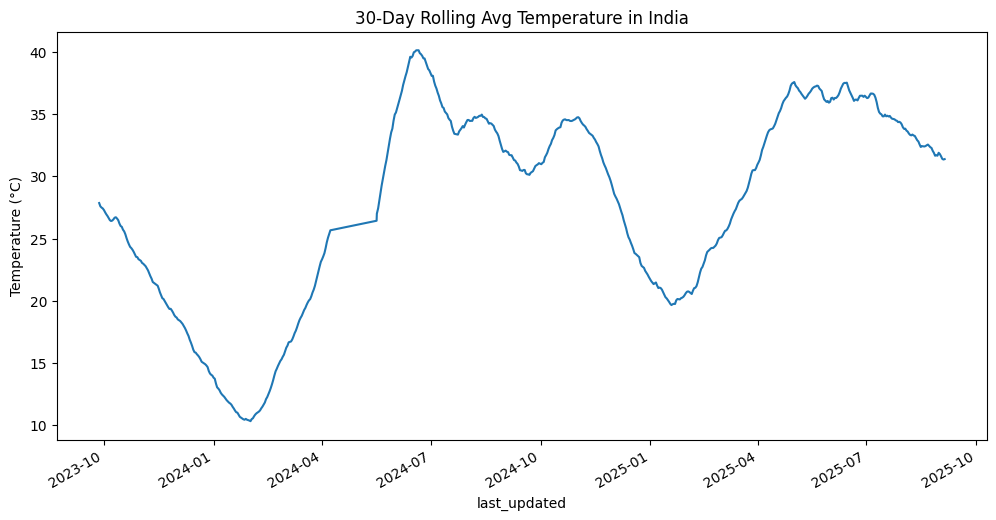

In [23]:
# ======================================================
# 8.Rolling Average (Time-Series Smoothing)
# Shows 30-day moving average for temperature in one country
# ======================================================
country = "India"  # change as needed
df_country = df[df["country"] == country].set_index("last_updated")

# Convert index to datetime objects
df_country.index = pd.to_datetime(df_country.index)

# Calculate rolling average with an integer window
df_country["temp_roll"] = df_country["temperature_celsius"].rolling(window=30).mean()

plt.figure(figsize=(12,6))
df_country["temp_roll"].plot()
plt.title(f"30-Day Rolling Avg Temperature in {country}")
plt.ylabel("Temperature (°C)")
plt.show()

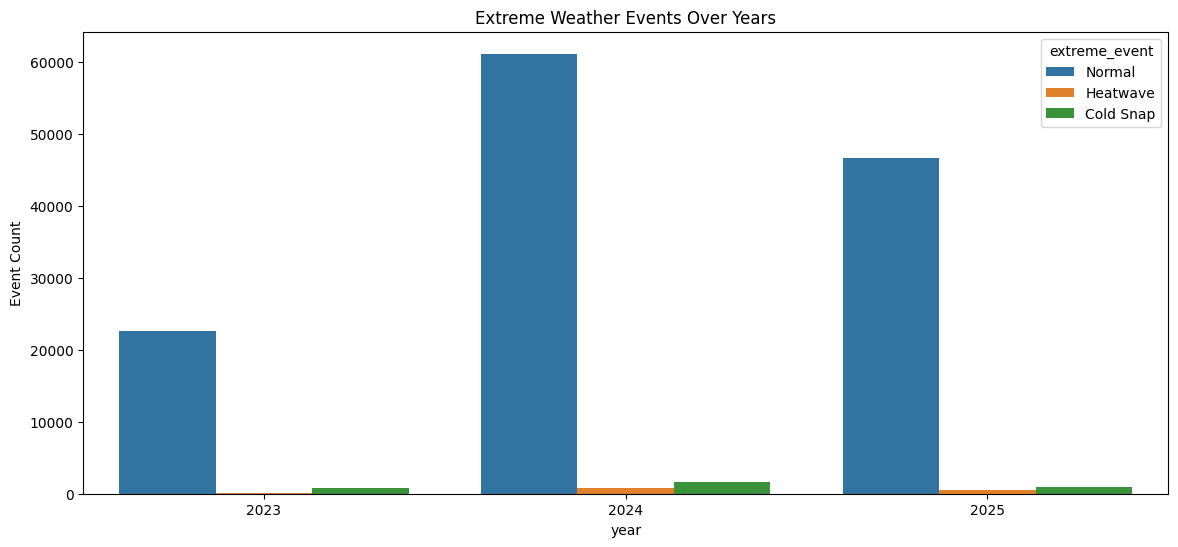

In [24]:
# ======================================================
# 9.Extreme Event Timeline
# Shows yearly counts of extreme weather (heat, cold, rain)
# ======================================================
df["extreme_event"] = np.where(df["temperature_celsius"]>40,"Heatwave",
                        np.where(df["temperature_celsius"]<0,"Cold Snap",
                        np.where(df["precip_mm"]>100,"Heavy Rain","Normal")))

plt.figure(figsize=(14,6))
sns.countplot(x="year", hue="extreme_event", data=df)
plt.title("Extreme Weather Events Over Years")
plt.ylabel("Event Count")
plt.show()

In [25]:
# ======================================================
# 10.Average Temperature by Country
# Choropleth map to visualize how temperature varies globally
# ======================================================

!pip install plotly geopandas -q

import plotly.express as px
import pandas as pd # Import pandas
import geopandas as gpd # Import geopandas


# Load cleaned dataset from Milestone 1
df = pd.read_csv("/content/cleaned_weather.csv")

# Compute average temperature per country
country_avg_temp = (
    df.groupby("country")["temperature_celsius"]
    .mean()
    .reset_index()
)

# Choropleth map using Plotly
fig = px.choropleth(
    country_avg_temp,
    locations="country",
    locationmode="country names",   # Match by country name
    color="temperature_celsius",
    color_continuous_scale="RdYlBu_r",  # Red=hot, Blue=cold
    title="Average Temperature by Country (°C)"
)

fig.show()

In [26]:
# ======================================================
#  11.Total Rainfall by Country
# ======================================================
country_total_rain = (
    df.groupby("country")["precip_mm"]
    .sum()
    .reset_index()
)

fig = px.choropleth(
    country_total_rain,
    locations="country",
    locationmode="country names",
    color="precip_mm",
    color_continuous_scale="GnBu",
    title="🌧 Total Rainfall by Country (mm)"
)
fig.show()


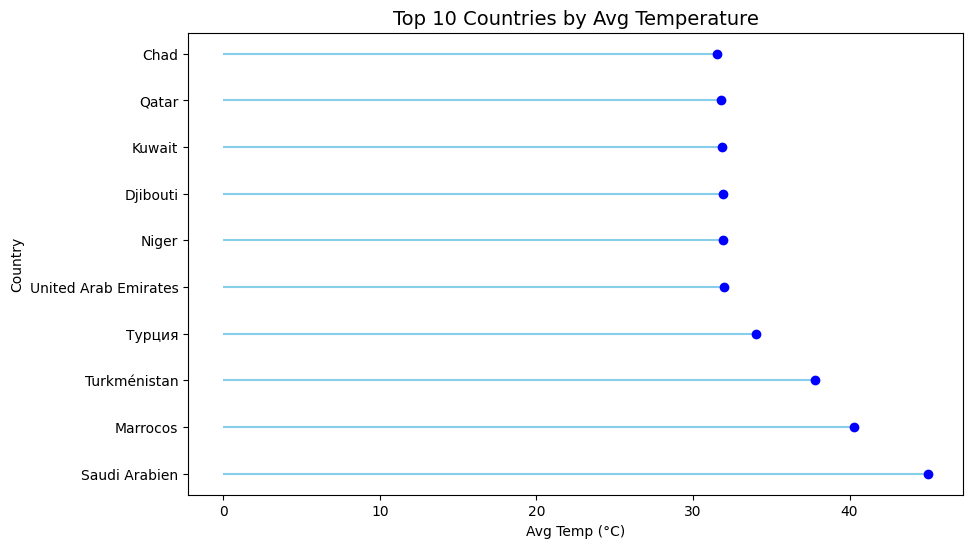

In [27]:
# ======================================================
#12. Top 10 Countries by average temperature
# ======================================================
plt.figure(figsize=(10,6))
plt.hlines(y=top10_temp["country"], xmin=0, xmax=top10_temp["temperature_celsius"], color="skyblue")
plt.plot(top10_temp["temperature_celsius"], top10_temp["country"], "o", color="blue")
plt.title("Top 10 Countries by Avg Temperature", fontsize=14)
plt.xlabel("Avg Temp (°C)")
plt.ylabel("Country")
plt.show()


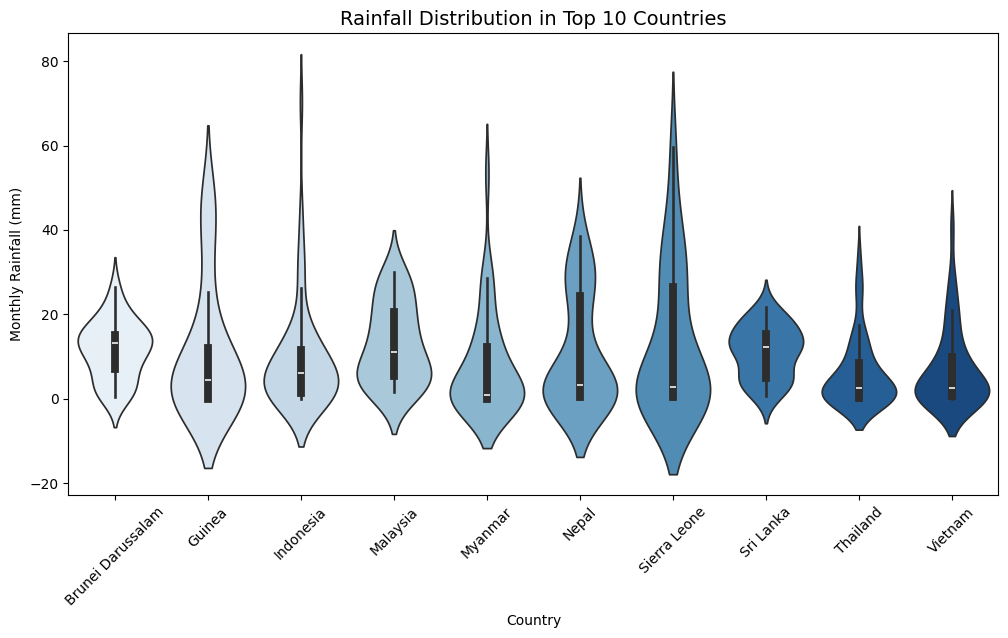

In [29]:
# ======================================================
# 13. Top 10 Countries by Total Rainfall
# ======================================================

# ======================================================
# 13. Top 10 Countries by Total Rainfall
# ======================================================
top10_rain_countries = (
    monthly.groupby("country")["precip_mm"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter dataset for only these countries
df_top10_rain = monthly[monthly["country"].isin(top10_rain_countries)]

# Violin plot
plt.figure(figsize=(12,6))
sns.violinplot(
    data=df_top10_rain,
    x="country",
    y="precip_mm",
    palette="Blues"
)
plt.title("Rainfall Distribution in Top 10 Countries", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Monthly Rainfall (mm)")
plt.xticks(rotation=45)
plt.show()
